In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import xgboost as xgb
import matplotlib
%matplotlib inline

In [42]:
train = pd.read_csv('train_house_price.csv')
test = pd.read_csv('test_house_price.csv')

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

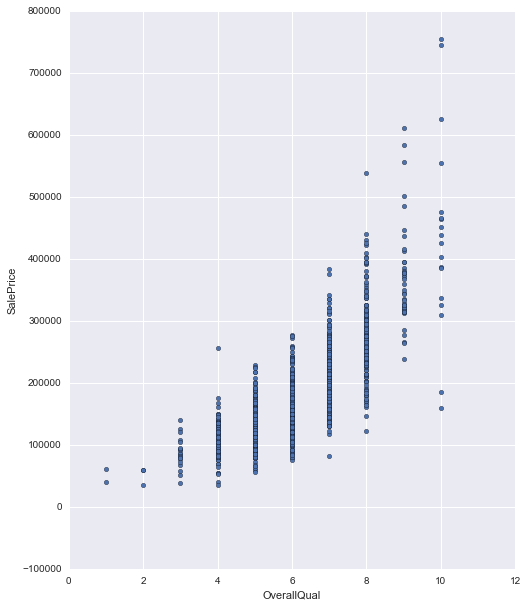

In [44]:
train.plot.scatter(x='OverallQual',y='SalePrice')

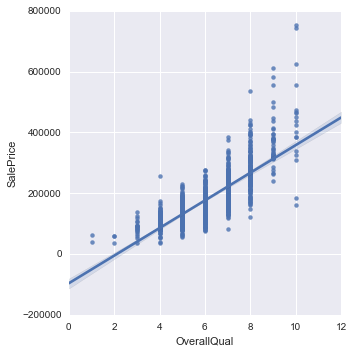

In [45]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

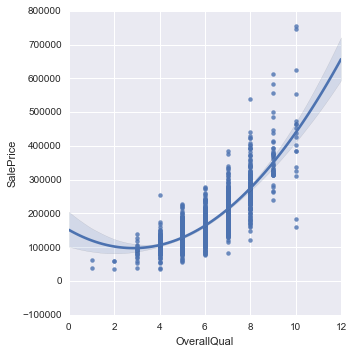

In [46]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train,order=2)

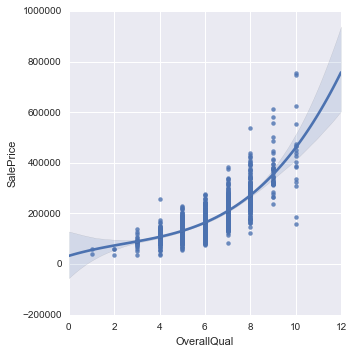

In [47]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train,order=3)

In [48]:
p = np.polyfit(train['OverallQual'],train['SalePrice'],3) # polynomial
p

array([   604.90309073,  -4472.39013336,  26931.55037894,  32828.19660132])

In [49]:
rmse = np.sqrt(np.square(train['SalePrice'] - np.polyval(p,train['OverallQual'])).mean())
print 'rmse :' , rmse

rmse : 44818.6531027


In [50]:
prediction = np.polyval(p,test['OverallQual'])

In [51]:
solution = pd.DataFrame({'id':test.Id,'SalePrice':prediction})
solution.to_csv('house_third_order',index=False)

In [52]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [53]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [54]:
train.diff_price = train['SalePrice'] - np.polyval(p,train['OverallQual'])

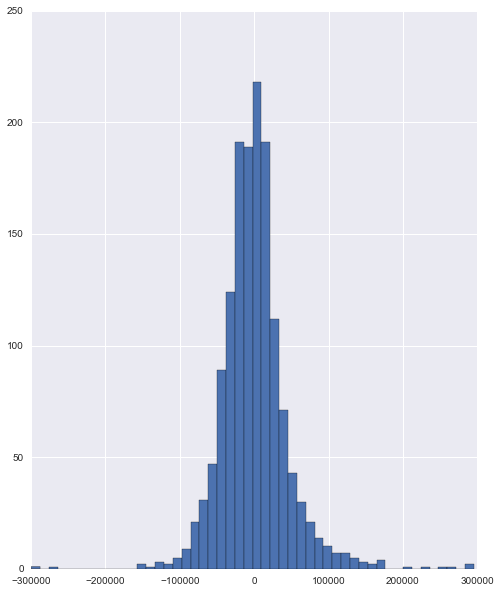

In [55]:
train.diff_price.hist(bins=50)

In [56]:
numeric = all_data.dtypes[all_data.dtypes !='object'].index
#numeric
skewed = train[numeric].apply(lambda x:skew(x.dropna()))
#skewed
skewed = skewed[skewed > 0.75]
skewed = skewed.index
all_data[skewed] = np.log1p(all_data[skewed])

In [57]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


In [58]:
all_data = pd.get_dummies(all_data)
all_data.fillna(all_data.mean(),inplace=True)
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.diff_price

In [60]:
dtrain = xgb.DMatrix(X_train,label=y)
dtest = xgb.DMatrix(X_test)
parameter = {'max_depth':4,'eta':0.1}
model = xgb.cv(parameter,dtrain,num_boost_round=500,early_stopping_rounds=100)

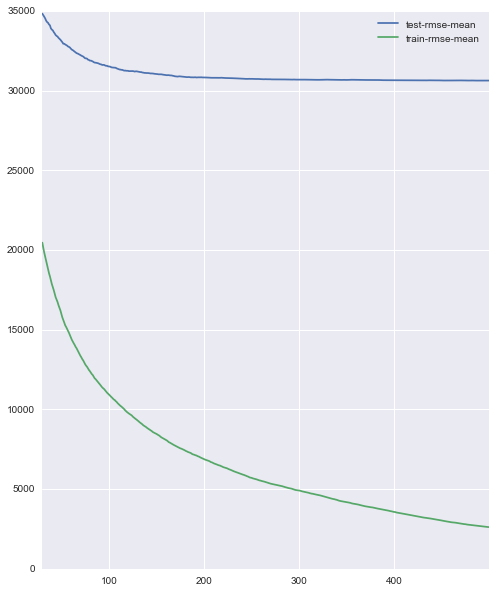

In [71]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [68]:
xgb_model = xgb.XGBRegressor(n_estimators=360,max_depth=2,learning_rate=0.1)
xgb_model.fit(X_train,y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [69]:
from sklearn.grid_search import GridSearchCV

In [80]:
cv_params = {'max_depth':[3,5,7],'min_child_weight':[1,3,5]}
ind_params = {'learning_rate':0.1,'n_estimators':1000,'seed':42,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear'}
optimzation = GridSearchCV(xgb.XGBRegressor(**ind_params),cv_params,scoring='mean_squared_error',cv=5,n_jobs=-1)

In [81]:
optimzation.fit(X_train,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [83]:
optimzation.grid_scores_

[mean: -882800364.68728, std: 295018968.44546, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: -775168248.64399, std: 247550089.84431, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: -835604790.16452, std: 293525507.01336, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: -952929071.65803, std: 231427308.99624, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: -881124620.10197, std: 291580948.39751, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: -886467725.52249, std: 296353655.02959, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: -1027535741.11361, std: 229403771.02547, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: -929783143.94117, std: 240809572.13587, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: -914982919.60431, std: 284606316.99967, params: {'max_depth': 7, 'min_child_weight': 5}]

In [84]:
optimzation.best_params_

{'max_depth': 3, 'min_child_weight': 3}

In [85]:
model_xgb = xgb.XGBRegressor(n_estimators=360,max_depth=3,min_child_weight=3,learning_rate=0.1)
model_xgb.fit(X_train,y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [87]:
y_pred = np.polyval(p,test.OverallQual) + model_xgb.predict(X_test)
y_pred

array([ 122251.17915963,  175000.41913279,  168797.55415963, ...,
        180212.07369088,  113926.42330025,  225968.73385554])

In [88]:
xgb_predicted = pd.DataFrame({'id':test.Id,'SalePrice':y_pred})
xgb_predicted.to_csv('xgb_house_price_predicited.csv',index=False)